# Import Libraries

In [8]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

We will chek what Pandas version is used in this  workspace

In [3]:
pd.__version__

'2.0.3'

# Import Dataset

In [5]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Check How Many Columns in The Dataset

In [6]:
df.shape

(20640, 10)

Check Missing Values in The Dataset

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

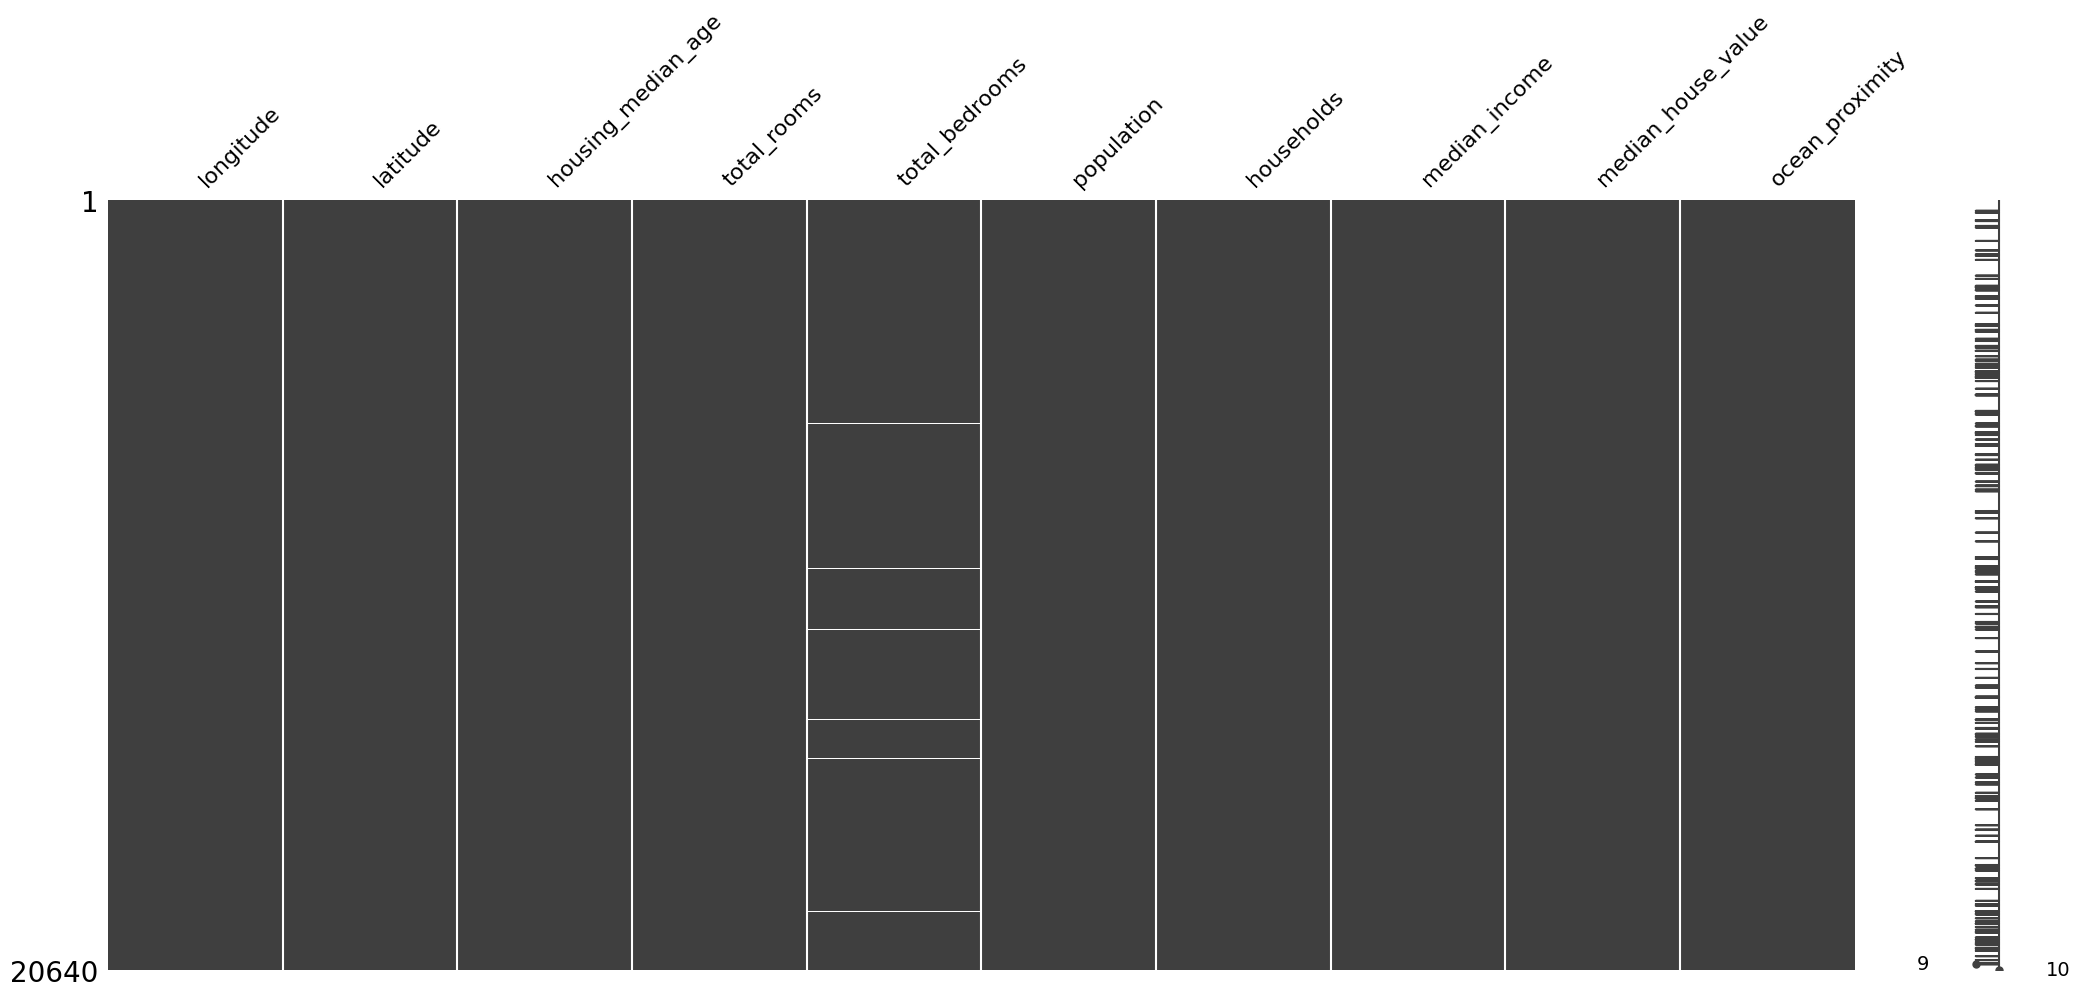

In [9]:
msno.matrix(df)
plt.show()

# Check How Many Unique Values in ocean_proximity Column

In [10]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Calculate The Average Value of The median_house_value Column

In [13]:
df[df['ocean_proximity']=='NEAR BAY']['median_house_value'].mean()

259212.31179039303

# Check The Average of total_bedrooms Column Before & After Imputing The Missing Values

In [14]:
print("The average of total_bedrooms before imputing the missing values is: ", df['total_bedrooms'].mean())

The average of total_bedrooms before imputing the missing values is:  537.8705525375618


In [15]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [16]:
print("The average of total_bedrooms after imputing the missing values is: ", df['total_bedrooms'].mean())

The average of total_bedrooms after imputing the missing values is:  537.8705525375617


# Hard Code Linear Regression

In [32]:
selected_columns = df[df['ocean_proximity']=='ISLAND'][['housing_median_age', 'total_rooms', 'total_bedrooms']]
X = selected_columns.to_numpy()
XTX = np.dot(X.T, X)
XTX_inverse = np.linalg.inv(XTX)
y = np.array([950, 1300, 800, 1000, 1300])
w = np.dot(np.dot(XTX_inverse, X.T), y)
last_element_of_w = w[-1]

print(last_element_of_w)

5.699229455065586
